# Análisis de datos financieros

En finanzas, la creación de un portafolio de inversiones que se adecúe a las necesidades y perfil de una persona es de gran importancia, no sólo normativa si no para que duerma un poco más tranquila por las noches.

Para eso, es necesario revisar muchas variables, desde precios de activos, hasta cotizaciones de monedas o variables macroeconómicas. En este primer práctico vamos a entender un poco más sobre los precios de los activos, en particular de las acciones, y algunas formas de visualizarlos.

Empecemos con la obtención de datos, a partir de lo que vimos en el Notebook Introductorio.

In [1]:
from pandas_datareader import data

In [2]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import quantstats as qs

Vamos a seleccionar el siguiente conjunto de acciones para analizar:

MELI--> Mercado Libre

DIS --> Disney

AAPL --> Apple 

PDD --> Pinduoduo

ZNGA --> Zinga

TSLA --> Tesla

GOOG --> Google

BABA --> Alibaba

BILI --> Bilibili

ABNB --> Airbnb

AMD --> AMD 

MSFT --> Microsoft

NVDA --> Nvidia

FB --> Facebook

CRM --> Salesforce

SHOP --> Shopify inc

PYPL --> Paypal

In [48]:
# Un ticker es la abreviación con la cual se encuentra al activo
# cuando se busca su precio o se realiza una orden de mercado.
tickers = ['MELI', 'DIS','AAPL','PDD','ZNGA','TSLA','GOOG','BABA','BILI','ABNB','AMD','MSFT','NVDA','FB','CRM','SHOP','PYPL']

# Definimos el rango de fechas deseado
start_date = '2020-01-01'
end_date = '2021-07-01'

# Obtenemos un DataFrame
df = data.DataReader(
    tickers,
    start=start_date, 
    end=end_date, 
    data_source='yahoo',
)

# Cómo seguimos?

Una **acción** es un instrumento que representa la propiedad de una fracción de una empresa. Esto nos da propiedad de una proporción de los activos y sus ganancias (o pérdidas) de acuerdo a cuántas unidades se posee. Es posible comprarlas y venderlas en mercados como BYMA en Argentina o el NYSE en USA (teniendo una cuenta comitente).

Por lo general, un buen recurso para aprender sobre instrumentos y estrategias de inversión en el mercado es la página de [Investopedia](https://www.investopedia.com).

Las acciones que descargamos aquí arriba son las de Mercado Libre en USA.

### Primeras filas

A continuacuón presentamos las primeras 5 filas del data set

In [49]:
df.head()

Attributes   Adj Close                                                     \
Symbols           MELI         DIS       AAPL        PDD  ZNGA       TSLA   
Date                                                                        
2020-01-02  610.190002  148.199997  74.207466  41.230000  6.15  86.052002   
2020-01-03  607.799988  146.500000  73.486023  40.889999  6.23  88.601997   
2020-01-06  606.549988  145.649994  74.071579  40.090000  6.27  90.307999   
2020-01-07  625.000000  145.699997  73.723213  41.209999  6.49  93.811996   
2020-01-08  633.440002  145.399994  74.909149  40.500000  6.59  98.428001   

Attributes                                           ...      Volume  \
Symbols            GOOG        BABA       BILI ABNB  ...        BABA   
Date                                                 ...               
2020-01-02  1367.369995  219.770004  20.950001  NaN  ...  15873500.0   
2020-01-03  1360.660034  217.000000  22.080000  NaN  ...   8604500.0   
2020-01-06  1394.209961  216.639999  23.209999  NaN  ...  11885500.0   
2020-01-07  1393.339966  217.630005  23.129999  NaN  ...   9388000.0   
2020-01-08  1404.319946  218.000000  23.840000  NaN  ...  11959100.0   

Attributes                                                                  \
Symbols           BILI ABNB         AMD        MSFT       NVDA          FB   
Date                                                                         
2020-01-02  12629400.0  NaN  80331100.0  22622100.0  5938400.0  12077100.0   
2020-01-03  11520900.0  NaN  73127400.0  21116200.0  5134600.0  11188400.0   
2020-01-06  10695200.0  NaN  47934900.0  20813700.0  6565900.0  17058900.0   
2020-01-07   7407000.0  NaN  58061400.0  21634100.0  7871400.0  14912400.0   
2020-01-08   7880800.0  NaN  53767000.0  27746500.0  6927700.0  13475000.0   

Attributes                                   
Symbols           CRM       SHOP       PYPL  
Date                                         
2020-01-02  5189300.0  1396700.0  7418800.0  
2020-01-03  3205400.0  1031700.0  7098300.0  
2020-01-06  8836200.0  1686000.0  6764500.0  
2020-01-07  8272700.0  1552900.0  6898700.0  
2020-01-08  7225100.0  1550100.0  8293600.0  

[5 rows x 102 columns]

### Agregar columna de mes y año

Se agrega en el data set la columa YearMonth que representa al mes y año

In [50]:
df['Date'] = df.index
df['YearMonth'] = pd.DatetimeIndex(df['Date']).strftime("%Y-%m")
df['YearMonth'] 

Date
2020-01-02    2020-01
2020-01-03    2020-01
2020-01-06    2020-01
2020-01-07    2020-01
2020-01-08    2020-01
               ...   
2021-05-28    2021-05
2021-06-01    2021-06
2021-06-02    2021-06
2021-06-03    2021-06
2021-06-04    2021-06
Name: YearMonth, Length: 359, dtype: object

### Agrupación por mes y año

In [51]:
groupMonth = df.groupby('YearMonth')
dfGroupMonth= groupMonth.mean()
dfGroupMonth.head()

Attributes   Adj Close                                              \
Symbols           MELI         DIS       AAPL        PDD      ZNGA   
YearMonth                                                            
2020-01     653.252380  142.859522  77.065129  38.679047  6.415238   
2020-02     681.306846  136.687367  77.048801  35.601052  6.752632   
2020-03     525.896817  101.887728  64.995947  35.200908  6.565909   
2020-04     556.459526  102.493333  67.458170  44.493333  7.256667   
2020-05     770.801004  110.954000  76.927945  58.035000  7.947000   

Attributes                                                       ...  \
Symbols           TSLA         GOOG        BABA       BILI ABNB  ...   
YearMonth                                                        ...   
2020-01     105.731809  1436.653797  218.497619  22.426667  NaN  ...   
2020-02     159.489368  1464.110519  215.670527  26.336316  NaN  ...   
2020-03     111.820273  1188.394098  193.393638  23.871818  NaN  ...   
2020-04     132.719715  1234.140480  201.817142  27.202857  NaN  ...   
2020-05     159.885102  1381.113751  202.727999  30.623500  NaN  ...   

Attributes        Volume                                                 \
Symbols             BABA          BILI ABNB           AMD          MSFT   
YearMonth                                                                 
2020-01     1.448077e+07  6.351448e+06  NaN  5.847057e+07  2.659667e+07   
2020-02     1.734157e+07  7.390679e+06  NaN  6.753405e+07  4.671170e+07   
2020-03     2.001316e+07  6.030095e+06  NaN  9.526760e+07  7.330434e+07   
2020-04     1.569998e+07  5.031795e+06  NaN  8.164837e+07  4.689071e+07   
2020-05     2.521594e+07  6.809325e+06  NaN  5.963490e+07  3.444225e+07   

Attributes                                                          \
Symbols             NVDA            FB           CRM          SHOP   
YearMonth                                                            
2020-01     7.292157e+06  1.653879e+07  4.989200e+06  1.792538e+06   
2020-02     1.559033e+07  1.671302e+07  6.211874e+06  2.880179e+06   
2020-03     1.792495e+07  2.952126e+07  1.032384e+07  3.195218e+06   
2020-04     1.342655e+07  2.577784e+07  6.950529e+06  4.145790e+06   
2020-05     1.568610e+07  2.547382e+07  7.115530e+06  4.155185e+06   

Attributes                
Symbols             PYPL  
YearMonth                 
2020-01     7.722700e+06  
2020-02     7.847432e+06  
2020-03     1.270848e+07  
2020-04     9.451952e+06  
2020-05     1.046154e+07  

[5 rows x 102 columns]

## Primer Acercamiento
En este caso, descargamos los precios DIARIOS de la acción de Mercado Libre. Los mismos vienen en 6 columnas. Por ahora podemos ignorar la que se llama *Adj Close* y vamos a utilizar las otras cinco para realizar nuestro primer análisis (Podemos hacer un drop de la columna que no usaremos).

El mercado está abierto durante los días hábiles y, para cada uno de esos días, tenemos los siguientes datos:
- el precio al cual comenzó a operar la acción, o apertura (Open),
- el máximo alcanzado en el día (High),
- el mínimo (Low),
- el precio al cual se operó por última vez la acción, o cierre (Close) y,
- la cantidad de acciones que se intercambiaron en el día (Volume)

Como primera consigna, puede ser de utilidad conseguir algunas estadísticas descriptivas de este dataset.

### Descripción del data set
Se describe acontinuación el Close, Low, High, Open y Volume de cada acción que fue seleccionada.

In [52]:
# Describir el dataset
df[['Close', 'Low','High','Open','Volume' ]].describe()    

Attributes        Close                                                  \
Symbols            MELI         DIS        AAPL         PDD        ZNGA   
count        359.000000  359.000000  359.000000  359.000000  359.000000   
mean        1155.806714  143.160864  105.166699   98.702451    8.936407   
std          419.058011   30.792073   23.982253   48.107953    1.485264   
min          447.339996   85.760002   56.092499   31.770000    5.870000   
25%          773.535004  118.405003   79.807503   56.385000    7.825000   
50%         1173.930054  135.389999  115.010002   87.529999    9.300000   
75%         1522.260010  176.055000  125.314999  138.250000    9.985000   
max         1984.339966  201.910004  143.160004  202.820007   12.180000   

Attributes                                                               ...  \
Symbols           TSLA         GOOG        BABA        BILI        ABNB  ...   
count       359.000000   359.000000  359.000000  359.000000  121.000000  ...   
mean        414.898364  1673.192755  238.921866   62.193315  171.165868  ...   
std         244.727898   349.173756   31.465459   37.671581   22.807129  ...   
min          72.244003  1056.619995  176.339996   20.190001  124.800003  ...   
25%         162.918999  1434.065002  215.705002   29.940001  149.770004  ...   
50%         411.760010  1541.739990  232.080002   45.139999  176.429993  ...   
75%         641.075012  1895.325012  262.974991  102.049999  187.369995  ...   
max         883.090027  2452.235107  317.140015  156.369995  216.839996  ...   

Attributes        Volume                                            \
Symbols             BABA          BILI          ABNB           AMD   
count       3.590000e+02  3.590000e+02  1.210000e+02  3.590000e+02   
mean        1.829235e+07  5.821027e+06  7.934054e+06  5.662781e+07   
std         1.145513e+07  3.095582e+06  8.177371e+06  2.423032e+07   
min         6.223988e+06  1.832265e+06  2.409700e+06  1.670590e+07   
25%         1.231855e+07  3.619750e+06  3.573600e+06  4.027790e+07   
50%         1.587350e+07  5.074500e+06  5.264100e+06  4.972090e+07   
75%         2.022120e+07  7.218900e+06  9.144900e+06  6.704405e+07   
max         1.418300e+08  2.429300e+07  7.044750e+07  2.053145e+08   

Attributes                                                          \
Symbols             MSFT          NVDA            FB           CRM   
count       3.590000e+02  3.590000e+02  3.590000e+02  3.590000e+02   
mean        3.493712e+07  1.101022e+07  2.163830e+07  7.299255e+06   
std         1.549686e+07  5.451035e+06  9.605172e+06  5.408631e+06   
min         1.055060e+07  2.447100e+06  6.702000e+06  2.676900e+06   
25%         2.472900e+07  6.885700e+06  1.540870e+07  4.605100e+06   
50%         3.080380e+07  9.361500e+06  1.933340e+07  5.805100e+06   
75%         3.927840e+07  1.421055e+07  2.487195e+07  8.201000e+06   
max         9.701270e+07  3.659210e+07  7.634390e+07  6.325340e+07   

Attributes                              
Symbols             SHOP          PYPL  
count       3.590000e+02  3.590000e+02  
mean        2.167009e+06  8.760104e+06  
std         1.332724e+06  3.800312e+06  
min         5.361130e+05  3.053800e+06  
25%         1.249350e+06  6.395700e+06  
50%         1.784400e+06  7.716200e+06  
75%         2.763200e+06  9.959100e+06  
max         1.105070e+07  3.548790e+07  

[8 rows x 85 columns]

### Plot del Low y High de MELI por mes
Se gráfica a continuación el LOW y el HIGH de MELI agrupado por MES para comparar el valor LOW y HIGH de cada mes

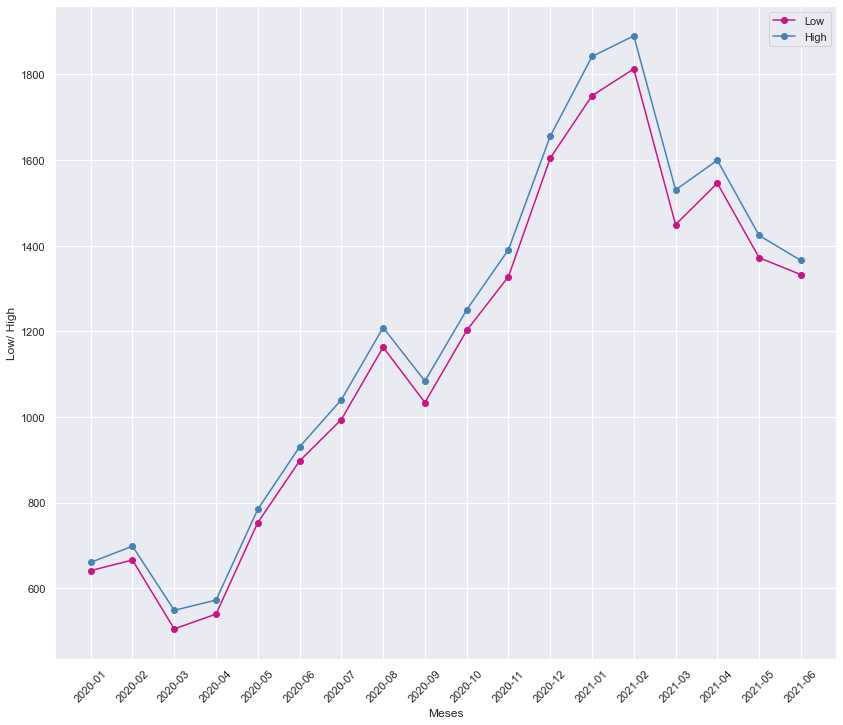

In [53]:
sns.set_theme()
fig = plt.figure(figsize=(14,12))
plt.plot('MELI', data=dfGroupMonth['Low'], marker='o', color='mediumvioletred', label='Low')
plt.plot('MELI', data=dfGroupMonth['High'], marker='o', color='steelblue', label='High')
plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Low/ High", fontdict=None, labelpad=None)
plt.xticks(rotation=45)
plt.legend()
plt.show()

En el gráfico podemos observar como el precio mínimo y máximo tienen una alta correlación.

### Plot del Open y Close de MELI por mes

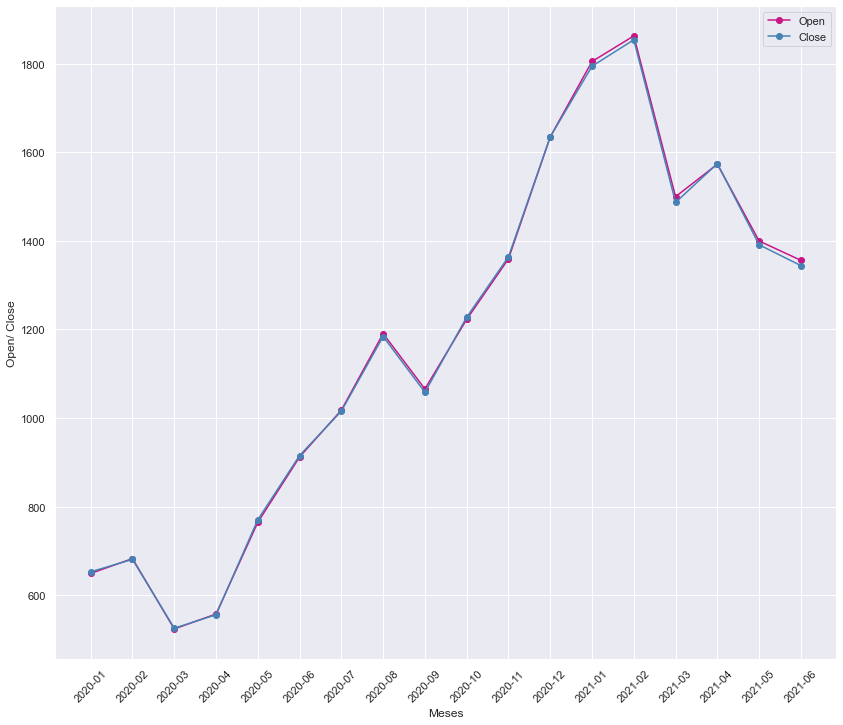

In [54]:
sns.set_theme()
fig = plt.figure(figsize=(14,12))
plt.plot('MELI', data=dfGroupMonth['Open'], marker='o', color='mediumvioletred', label='Open')
plt.plot('MELI', data=dfGroupMonth['Close'], marker='o', color='steelblue', label='Close')
plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Open/ Close", fontdict=None, labelpad=None)
plt.xticks(rotation=45)
plt.legend()
plt.show()

En el gráfico podemos observar que el valor de open y de close para meli es similar para cada uno de los meses por tal motivo las curvas se van tan encimadas, ya que la variación entre la apertura y el cierre es muy chica.

### Plot del Open y Close de BABA por mes

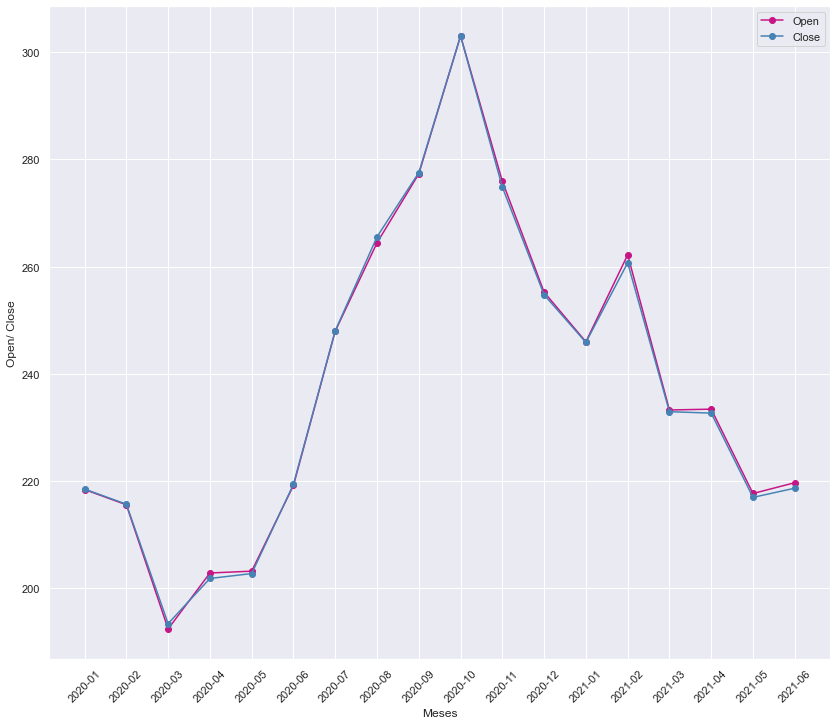

In [55]:
sns.set_theme()
fig = plt.figure(figsize=(14,12))
plt.plot('BABA', data=dfGroupMonth['Open'], marker='o', color='mediumvioletred', label='Open')
plt.plot('BABA', data=dfGroupMonth['Close'], marker='o', color='steelblue', label='Close')
plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Open/ Close", fontdict=None, labelpad=None)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Realizamos la comparación del open y close de la acción BABA en donde observamos que a diferencia de MELI suele tener mayores variaciones entre el precio de apertura y el precio de cierre.

### Cambios porcentuales de Volumen por acción.
Analizamos a partir del siguiente gráfico los cambios en porcentaje del volumen de cada acción

In [56]:
fig = px.bar(dfGroupMonth["Volume"], facet_col="Symbols",facet_col_wrap=6,
            labels={
                     "Symbols": "Ticker"
                 })
fig.show() 

## Gráficos de Vela

![Gráfico de Vela](https://media.istockphoto.com/vectors/stock-exchange-vector-id867941110?k=6&m=867941110&s=612x612&w=0&h=zE-LBIx2hT0eNEfDnuk1EQsGuWplf_hP76ETagH_vic=)

Los gráficos de vela son una buena forma de visualizar la evolución de los precios de un instrumento en cualquier intervalo de tiempo. La forma de leerlos es la siguiente:

- Cada barra comprime la información de un período (en nuestro caso puede ser cada fila).
- Si el precio de cierre es mayor al de apertura, el color de la vela es verde, caso contrario es rojo y el tope y base de la barra denotan esos precios.
- El máximo alcanzado en el período es la parte superior de la línea y el mínimo es la parte más baja de la línea.
- Algunos gráficos, además, tienen una visualización inferior en forma de barras para el volumen operado de cada período.

Podemos hacer un gráfico de vela con el dataframe que creamos? Queda bastante lindo (e interactivo!) si lo hacemos con la librería [Plotly](https://plot.ly/python/candlestick-charts/).

### Gráfico de Vela de MELI

In [57]:
def plotCandlestick(ticker):
# Create subplots and mention plot grid size
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.08, subplot_titles=(ticker, 'Volumen'), 
               row_width=[0.3, 0.7])

    fig.add_trace(
    go.Candlestick(
        x=df.index,
        open=df['Open'][ticker].squeeze(), high=df['High'][ticker].squeeze(),
        low=df['Low'][ticker].squeeze(), close=df['Close'][ticker].squeeze(),name=ticker),row=1, col=1

    )

# Bar trace for volumes on 2nd row without legend
    fig.add_trace(go.Bar(x=df.index, y=df['Volume'][ticker].squeeze(), showlegend=False, name = ticker), row=2, col=1)

# Do not show OHLC's rangeslider plot 
    fig.update(layout_xaxis_rangeslider_visible=False)
    fig.show()

In [58]:
plotCandlestick('MELI')

## Retornos Periódicos

Si bien es útil entender el comportamiento de un activo a través de sus precios, los precios no son comparables de forma directamente entre diferentes activos. Dado que son valores nominales que dependen de una serie de eventos corporativos, poco podemos decir respecto a dos compañias solo porque una cotice a 1 dólar y otra a 100.

Lo importante en finanzas es conocer los RETORNOS o rendimientos de los activos y el primer paso para hacerlo es ver cuánto varía el precio de un activo desde un cierre hasta el próximo. Para eso existe el muy útil método [pct_change](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html).

Vamos a ver qué tan útil termina siendo esto:
- Grafiquemos la serie de tiempo (solamente plot de Pandas) de los precios de Close para dos acciones.
- Hagamos lo mismo para los retornos de las acciones.

### Close para dos acciones
Se gráfica el valor de Close para las acciones BABA y MELI en donde observamos que las dos curvas son MUY diferentes

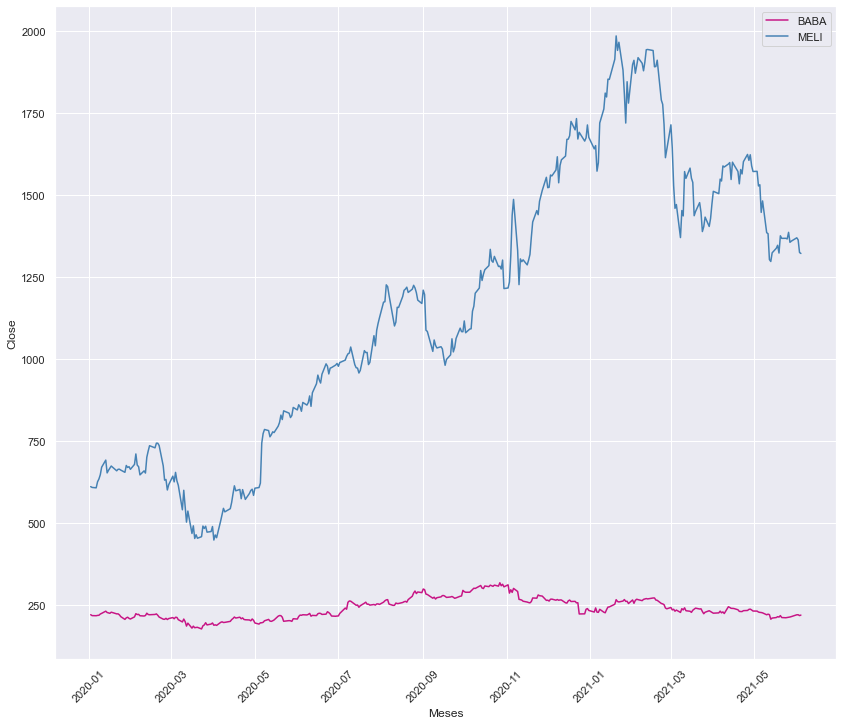

In [59]:
sns.set_theme()
fig = plt.figure(figsize=(14,12))
plt.plot('BABA', data=df['Close'], color='mediumvioletred')
plt.plot('MELI', data=df['Close'], color='steelblue')
plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Close", fontdict=None, labelpad=None)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Cálculo de retornos para MELI

In [60]:
s = pd.Series(df['Close']['MELI'].squeeze())
retornosMeli = s.pct_change(periods=1, fill_method='pad', limit=None, freq=None)

Parece que va a ser más sencillo revisar algo en este espacio de retornos:

- Veamos estadísticas básicas (media, desviación estándar, moda).
- Hagamos un distplot de la distribución de los retornos.
- Una afirmación que se suele hacer con los retornos diarios de activos financieros, es que se asemejan bastante a una distribución normal. Es así en este caso?


### Descripción de los retornos de MELI

In [61]:
retornosMeli.describe()

count    358.000000
mean       0.002782
std        0.035340
min       -0.127630
25%       -0.014991
50%        0.004596
75%        0.023552
max        0.196380
Name: MELI, dtype: float64

### Gráfico de los retornos de MELI

Text(0.5, 1.0, 'Retorno de MELI')

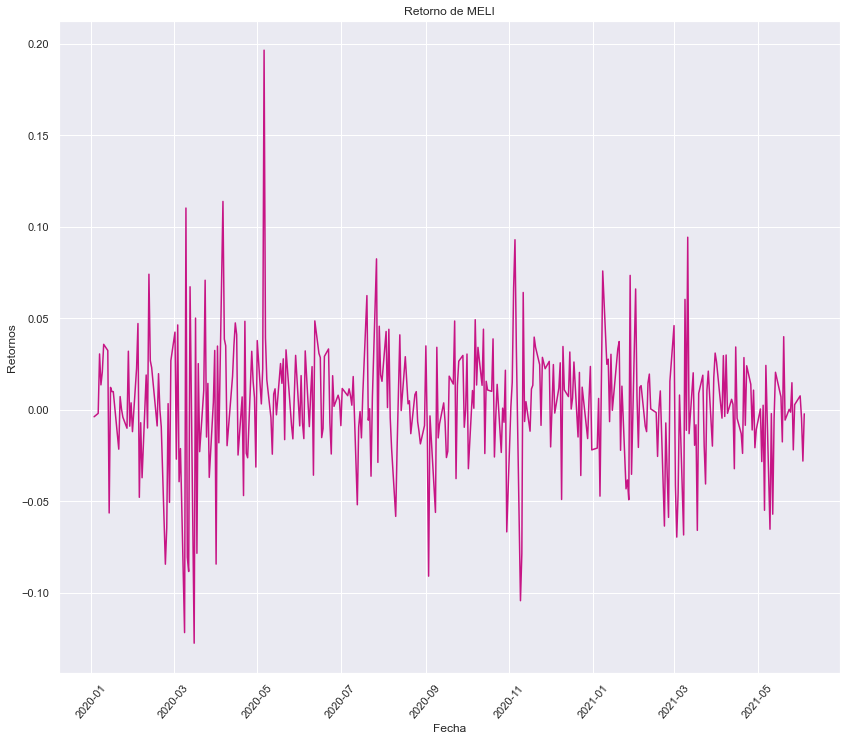

In [62]:
sns.set_theme()
fig = plt.figure(figsize=(14,12))
plt.plot(retornosMeli, color='mediumvioletred')
plt.xticks(rotation=50)
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.title('Retorno de MELI')

### Distribución de retornos de MELI

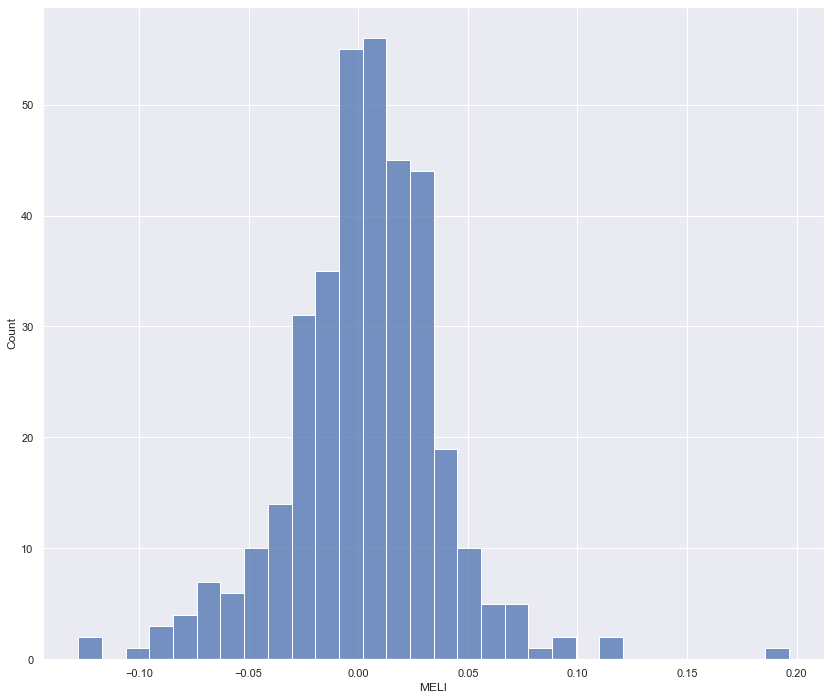

In [63]:
fig = plt.figure(figsize=(14,12))
sns.set(style="darkgrid")
sns.histplot(retornosMeli)
plt.show()

### Retornos preriódicos por acción

In [64]:
fig = px.area(dfGroupMonth["Adj Close"].pct_change(), facet_col="Symbols",facet_col_wrap=6,
                         labels={
                     "Symbols": "Ticker"
                 })
fig.show()

## Volatilidad de un activo financiero

A veces, además de saber cuánto dinero se ganó o perdió con algún activo financiero, también es de utilidad saber qué tan volátil fue ese retorno. Algunos activos tienen un buen rendimiento a lo largo del tiempo, pero a cambio de que su precio experimente subidas y bajadas muy pronunciadas. Para muchas personas, esto puede ser inaceptable, porque no todas tienen una idea de cuánto tiempo pueden dejar su dinero invertido en una acción o si lo necesitarán algún día en caso de emergencia.

Una buena medida de la volatilidad de un activo financiero es la **desviación estándar de sus retornos**. Podemos intentar graficar la media de los retornos vs. su volatilidad en un scatterplot. Podemos hacerlo para muchas acciones diferentes, o para ventanas de tiempo de una misma acción (usando [Rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) para nuestro DataFrame). 

### Cálculo de la volátilidad de cada acción

In [65]:
meanList = []
stdList = []
retornosList = []
for i in tickers:
    s = pd.Series(df['Close'][i].squeeze())
    retornos = s.pct_change(periods=1, fill_method='pad', limit=None, freq=None)
    retornosList.append(retornos)
    std = retornos.std()
    mean= retornos.mean()
    meanList.append(mean)
    stdList.append(std)

### Gráfico de volatilidad de cada acción


In [66]:
#aux_size = np.full(len(tickers),0.5)
fig = px.scatter(tickers, x=meanList, y=stdList, color=tickers,#size=aux_size,
                labels={
                     "color": "Ticker",
                     "x": "Media",
                     "y": "Volatilidad/ Desviación"
                 },
                title='Volatilidad')
fig.show()

## Sharpe Ratio

Este cociente fue ideado por William Sharpe (economista y ganador del Premio Nobel) para ayudar a entender el retorno de una inversión comparado con el riesgo de la misma. Se puede conseguir dividiendo el exeso de retorno (la diferencia entre el retorno del activo y el de un activo libre de riesgo) de una inversión por su volatilidad. En una primera aproximación podemos asumir que el retorno libre de riesgo es Cero y simplemente tomamos el cociente rendimiento / riesgo.

Este cociente se lee como "unidades de retorno que brinda un activo por cada unidad de riesgo asumida". De esa forma se obtiene un indicador que permite comparar activos de diferentes niveles de retorno y riesgo en un mismo espacio, y es una buena adición al gráfico de retorno vs. volatilidad como su "hue".

Valores altos de Sharpe Ratio siempre son buscados, porque representan una muy buena relación retorno-riesgo para una inversión, pero una de las "debilidades" que tiene es que se asume que los retornos tienen una distribución normal (esto se cumple?). Aún así, es una métrica muy utilizada en el mundo para evaluar la fortaleza tanto de activos individuales, como conjuntos de activos e incluso estrategias de trading.

Cómo podríamos modificar el scatterplot anterior para agregarlo?

### Cálculo del Sharpe Ratio de cada acción

In [67]:
excesoRetornoList = []
for i,_ in enumerate(meanList):
    excesoRetorno = (meanList[i] - 0) / stdList[i]
    excesoRetorno= round(excesoRetorno,4)
    excesoRetornoList.append(excesoRetorno)
print("Exceso de retornos:", excesoRetornoList) 

Exceso de retornos: [0.0787, 0.0317, 0.0672, 0.0967, 0.0688, 0.1295, 0.0839, 0.0121, 0.1259, 0.0281, 0.058, 0.063, 0.1048, 0.0611, 0.0477, 0.0958, 0.0932]


### Gráfico del Sharpe Rario de cada acción

In [68]:
fig = px.scatter(tickers, x=meanList, y=stdList, color=tickers,size=excesoRetornoList,
                labels={
                     "color": "Ticker",
                     "x": "Media",
                     "y": "Volatilidad",
                    "size":"Sharpe Ratio"
                 },
                title='Sharpe Radio')
fig.show()

## Análisis extra

### Volumen promedio y Cierre ajustado MELI
Comparamos a continuación el volumen promedio con el ciere ajustado para MELI

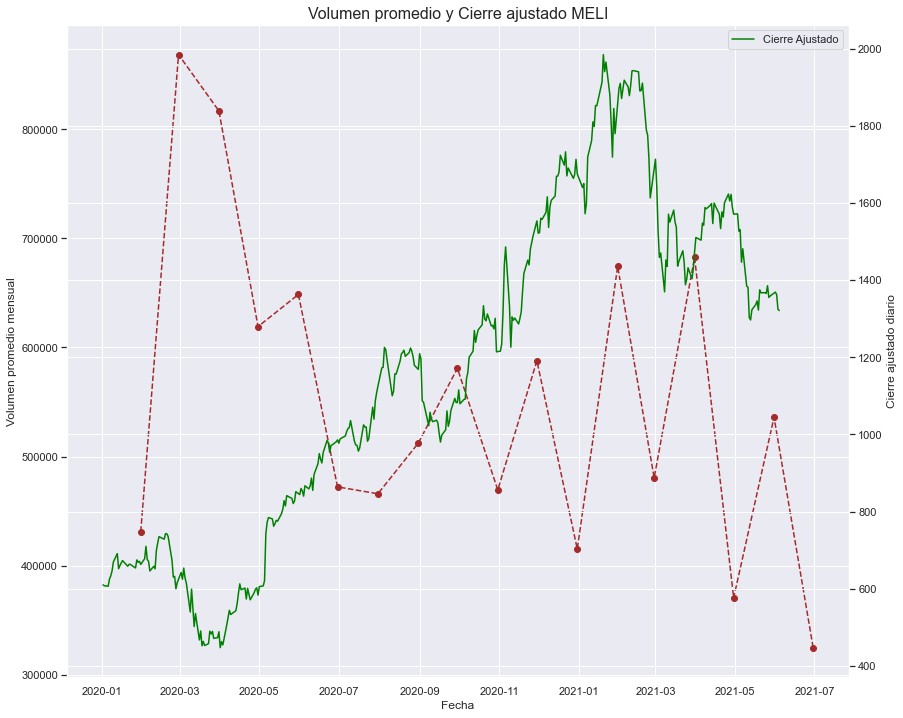

In [69]:
fig, ax1 =plt.subplots(figsize=(14,12))

ax2=ax1.twinx()
ax1.plot(df['Volume']['MELI'].resample('M').mean(),marker='o',linestyle='--',color='brown',label='Volumen')
ax2.plot(df['Adj Close']['MELI'], color='green',label='Cierre Ajustado')
plt.title("Volumen promedio y Cierre ajustado MELI",fontsize=16)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Volumen promedio mensual")
ax2.set_ylabel("Cierre ajustado diario")
plt.legend()
plt.show()

Por un lado hemos agrupado el volumen promedio mensual junto con el cierre ajustado de la acción. Este gráfico da cuenta de que el volumen promedio no reacciona en la misma dirección que su precio.

## Volatilidad  y Rendimiento aritmético

In [70]:
df_meli = df.xs('MELI',level='Symbols',axis=1)

Agregamos una nueva variable a nuestro dataframe: el rendimiento aritmético diario, esta es importante porque da cuenta de los retornos de la acción y por ende de la rentabilidad de invertir en la misma.

In [71]:
df_meli["R_A"]=df_meli["Adj Close"].pct_change()

<ipython-input-71-a95f7b04fe24>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Rendimiento aritmético diario')

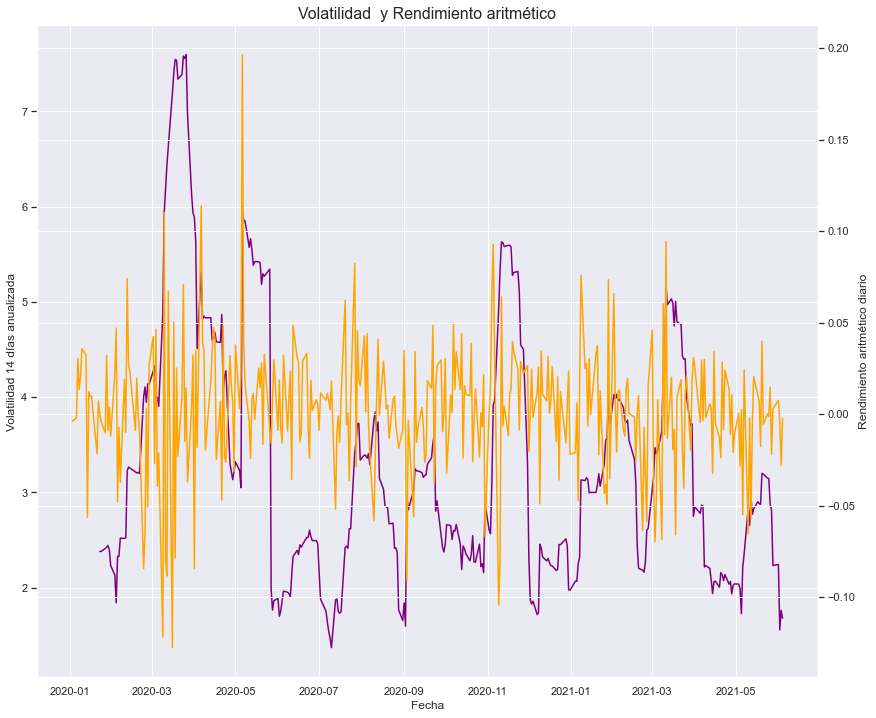

In [72]:
fig, ax3 =plt.subplots(figsize=(14,12))

ax3.plot(100*df_meli["R_A"].rolling(14).std(),color='purple')
ax4=ax3.twinx()
ax4.plot(df_meli["R_A"],color='orange')
plt.title("Volatilidad  y Rendimiento aritmético",fontsize=16)
ax3.set_xlabel("Fecha")
ax3.set_ylabel("Volatilidad 14 días anualizada")
ax4.set_ylabel("Rendimiento aritmético diario")

En este gráfico se observa la evolución del rendimiento diario y la volatilidad promedio de 14 días del activo

## Retornos acumulados , evolución del Dropdown y retornos diario

In [73]:
##Instalamos extensiones y exploramos las funciones de librería qs 
qs.extend_pandas()

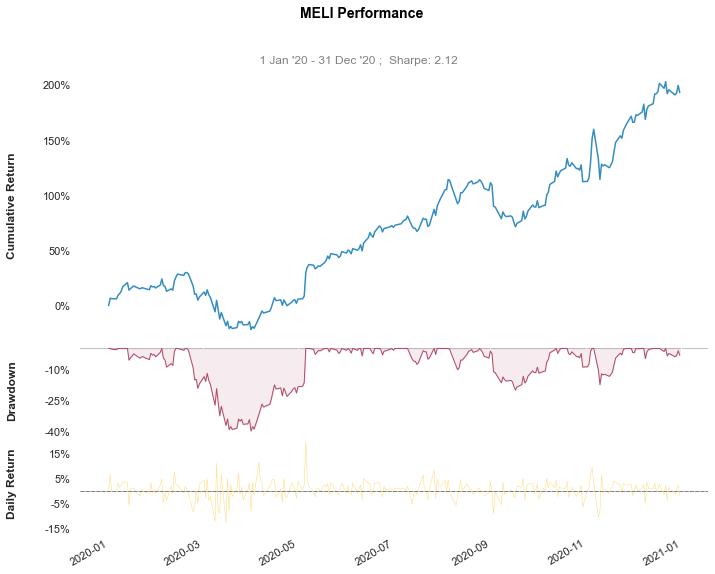

In [74]:
##Definimos nuestra variable meli igual a los retornos desde el inicio de su cotiazción al día de la fecha.
meli=qs.utils.download_returns('MELI',period='max')
##Meli es igual a una serie definida en un período de tiempo  más extenso del requerido.
##Filtramos nuestra serie para el período 2020.
meli_f=meli.filter(like='2020', axis=0)
##Graficamos nuestra nueva serie
meli_f.plot_snapshot(title='MELI Performance', lw=1.5)


Luego de presentar conjuntamente las variables mencionadas, es posbile estimar los renimientos mensuales de la acción y su distribución.

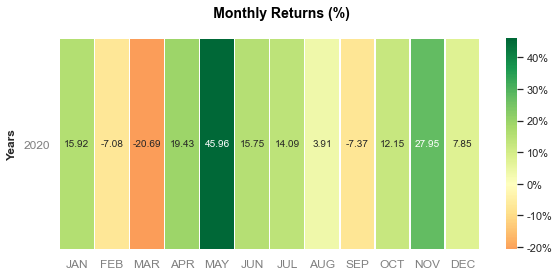

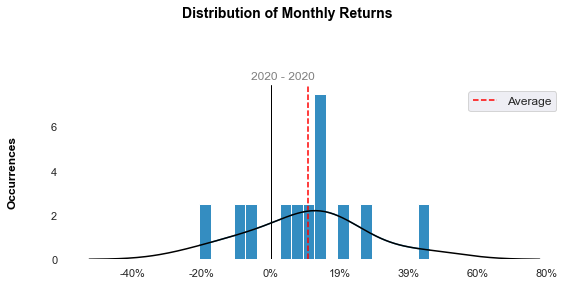

In [75]:
fig1=meli_f.plot_monthly_heatmap(figsize=(8,4))
fig3=meli_f.plot_histogram(figsize=(8,4))

Durante 2020 se observa que existen tres meses de rendimiento negativo siendo el más pronunciado durante el mes de Marzo (Coincidente con el inicio de los confinamientos a nivel global). A su vez el mes de mayor rendimiento se observa durante el mes de Mayo.